In [1]:
from sklearn.datasets import load_iris
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#Load data
iris = load_iris()
X = iris.data
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (120, 4)
y_train shape: (120,)


In [3]:
# Train the model
#Random Forest Model
#No knowledge of the of flower species
r_model = RandomForestClassifier(random_state=42)

#Train the model on the training data
#So the student learning the process
r_model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [4]:
#Make Predictions
y_pred = r_model.predict(X_test)

#To get the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy *100:.2f}%")

Accuracy: 96.67%


In [5]:
#Predict New data

new_flower = [[5.1, 3.5, 1.4, 0.2]]
predicted_species = iris.target_names[r_model.predict(new_flower)][0]

print(f"Predicted species: {predicted_species}")


Predicted species: setosa


In [6]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score

In [7]:
#Load data
diabetes_data = load_diabetes()
X_diabetes = diabetes_data.data
y_diabetes = diabetes_data.target

#Split the dataset
X_diabetes_train, X_diabetes_test, y_diabetes_train, y_diabetes_test = train_test_split(X_diabetes, y_diabetes, random_state=42, test_size=0.2)


model_diabetes = RandomForestRegressor(random_state=42)

learning = model_diabetes.fit(X_diabetes_train, y_diabetes_train)

#Predictions 
predict_diabetes = model_diabetes.predict(X_diabetes_test)

mse = mean_squared_error(y_diabetes_test, predict_diabetes)
r2 = r2_score(y_diabetes_test, predict_diabetes)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 2952.01
R² Score: 0.44


In [8]:
import requests
from bs4 import BeautifulSoup


In [9]:
#Fetch the webpage
url = "http://books.toscrape.com/"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

#Find all product containers
books = soup.find_all("article", class_="product_pod")

#Step 3 Extract Data
data = []
for book in books:
    title = book.h3.a["title"]
    price = book.find("p", class_="price_color").text
    data.append({"Title": title, "Price":price})

#Step 4: Save to DataFrame
df = pd.DataFrame(data)
print(df.head()) 




                                   Title    Price
0                   A Light in the Attic  Â£51.77
1                     Tipping the Velvet  Â£53.74
2                             Soumission  Â£50.10
3                          Sharp Objects  Â£47.82
4  Sapiens: A Brief History of Humankind  Â£54.23


In [10]:
#For zillow

"""" Property Address: Street, city, state, ZIP code.

    Listing Price: Current or estimated price.

    Bedrooms: Number of bedrooms.

    Bathrooms: Number of bathrooms.

    Square Footage: Total living area.

    Property Type: House, condo, apartment, etc.

    Listing URL: Link to the full listing."""""

url = "https://www.zillow.com/birmingham-al/"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

#Find all product Containers
prop_add = soup.find_all("article", class_="StyledPropertyCard-c11n-8-107-0__sc-g2ckw9-0 liyVnN StyledPropertyCard-srp-8-107-0__sc-1o67r90-0 chwyWU property-card list-card_not-saved")

#extract address
address = []

for houses in prop_add:
    house_address = houses.a.address["StyledPropertyCardDataArea-c11n-8-107-0__sc-10i1r6-0 iwOFcv property-card-link"]
    house_prices = houses.find("span", class_="property-card-price").text
    address.append({"House Address": house_address, "House Prices":house_prices})


df = pd.DataFrame(address)
print(df.head())
    



Empty DataFrame
Columns: []
Index: []


In [11]:
# Quotes to scrape

url = "http://quotes.toscrape.com/"
response = requests.get(url)
soup = BeautifulSoup(response.text,"html.parser")


#Find all quote containers
quotes = soup.find_all("div", class_="quote")


output_data = []

for words in quotes:
    full_quotes = words.find("span", class_='text').text
    author_name = words.find("small", class_="author").text
    output_data.append({"Quotes":full_quotes, "Author name":author_name})


df = pd.DataFrame(output_data)

print(df.head())





                                              Quotes      Author name
0  “The world as we have created it is a process ...  Albert Einstein
1  “It is our choices, Harry, that show what we t...     J.K. Rowling
2  “There are only two ways to live your life. On...  Albert Einstein
3  “The person, be it gentleman or lady, who has ...      Jane Austen
4  “Imperfection is beauty, madness is genius and...   Marilyn Monroe


In [12]:
"""url = "https://worldpopulationreview.com/"
response = requests.get(url)
soup = BeautifulSoup(response.text,"html.parser")


population = soup.find_all("table", class_="wpr-table")

pop_data = []

for numbers in population:
    country = numbers.find("a", class_="to").text
    num_population = numbers.find("td", class_="z-40 px-3 py-1.5 text-sm text-wpr-table_text md:px-4").text
    pop_data.append({"Country":country, "Population":num_population})


df = pd.DataFrame(pop_data)

print(df.head())"""

'url = "https://worldpopulationreview.com/"\nresponse = requests.get(url)\nsoup = BeautifulSoup(response.text,"html.parser")\n\n\npopulation = soup.find_all("table", class_="wpr-table")\n\npop_data = []\n\nfor numbers in population:\n    country = numbers.find("a", class_="to").text\n    num_population = numbers.find("td", class_="z-40 px-3 py-1.5 text-sm text-wpr-table_text md:px-4").text\n    pop_data.append({"Country":country, "Population":num_population})\n\n\ndf = pd.DataFrame(pop_data)\n\nprint(df.head())'

In [13]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://worldpopulationreview.com/"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# Find the table (use a simpler selector)
table = soup.find("table")
pop_data = []

for row in table.find_all("tr")[1:]:
    columns = row.find_all("td")
    country = columns[0].text.strip()
    population_24 = columns[1].text.strip()
    population_23 = columns[2].text.strip()
    pop_data.append({"Country":country,
                    "population 2024":population_24,
                    "Population 2023":population_23})



df = pd.DataFrame(pop_data)
print(df.head(11))

          Country population 2024 Population 2023
0           India   1,450,940,000   1,438,070,000
1           China   1,419,320,000   1,422,580,000
2   United States     345,427,000     343,477,000
3       Indonesia     283,488,000     281,190,000
4        Pakistan     251,269,000     247,504,000
5         Nigeria     232,679,000     227,883,000
6          Brazil     211,999,000     211,141,000
7      Bangladesh     173,562,000     171,467,000
8          Russia     144,820,000     145,440,000
9        Ethiopia     132,060,000     128,692,000
10         Mexico     130,861,000     129,740,000


In [14]:
#States by Population

url = "https://worldpopulationreview.com/states"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")


states = soup.find("table")
output_data = []

for state in states.find_all("tr")[1:]:
    columns = state.find_all("td")
    state = state.th.a.text
    rank = columns[0].text.strip()
    pop_24 = columns[1].text.strip()
    pop_23 = columns[2].text.strip()
    output_data.append({"State":state,
                        "Rank":rank,
                        "population 2024":pop_24,
                        "Population 2023":pop_23})
    

df = pd.DataFrame(output_data)

print(df)

    

             State Rank population 2024 Population 2023
0       California    1      38,889,800      38,965,200
1            Texas    2      30,976,800      30,503,300
2          Florida    3      22,975,900      22,610,700
3         New York    4      19,469,200      19,571,200
4     Pennsylvania    5      12,951,300      12,961,700
5         Illinois    6      12,516,900      12,549,700
6             Ohio    7      11,812,200      11,785,900
7          Georgia    8      11,145,300      11,029,200
8   North Carolina    9      10,975,000      10,835,500
9         Michigan   10      10,041,200      10,037,300
10      New Jersey   11       9,320,860       9,290,840
11        Virginia   12       8,752,300       8,715,700
12      Washington   13       7,841,280       7,812,880
13         Arizona   14       7,497,000       7,431,340
14       Tennessee   15       7,204,000       7,126,490
15   Massachusetts   16       7,020,060       7,001,400
16         Indiana   17       6,892,120       6,

In [15]:
#Top 10 States Graph

import matplotlib.pyplot as plt
import numpy as np


In [16]:
  # Ensure positive values
#df["population 2024"] = df["population 2024"].str.replace(',', '').astype(int)


df

,State,Rank,population 2024,Population 2023
0,California,1,"38,889,800","38,965,200"
1,Texas,2,"30,976,800","30,503,300"
2,Florida,3,"22,975,900","22,610,700"
3,New York,4,"19,469,200","19,571,200"
4,Pennsylvania,5,"12,951,300","12,961,700"
5,Illinois,6,"12,516,900","12,549,700"
6,Ohio,7,"11,812,200","11,785,900"
7,Georgia,8,"11,145,300","11,029,200"
8,North Carolina,9,"10,975,000","10,835,500"
9,Michigan,10,"10,041,200","10,037,300"


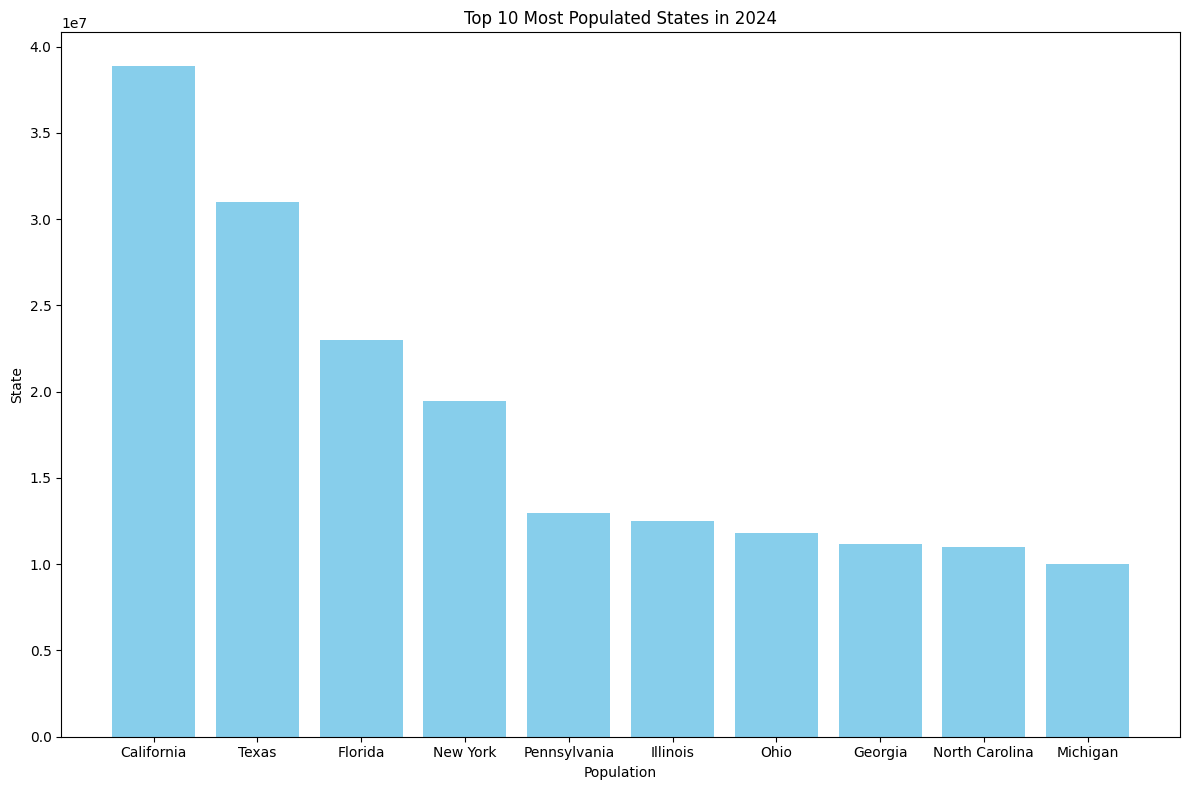

In [17]:
# Remove commas and convert to numeric
df["population 2024"] = df["population 2024"].astype(str).str.replace(",", "").astype(float)

df_sorted = df.sort_values(by="population 2024", ascending=False).head(10)

plt.figure(figsize=(12, 8))
plt.bar(df_sorted["State"], df_sorted["population 2024"], color='skyblue')
plt.xlabel("Population")
plt.ylabel("State")
plt.title("Top 10 Most Populated States in 2024")
 # Ensures highest population is at the top
plt.tight_layout()
plt.show()


In [18]:
import plotly.express as px
import us  # Install with: pip install us


df["State"] = df["State"].apply(lambda x: us.states.lookup(x).abbr if us.states.lookup(x) else x)
df["population 2024"] = pd.to_numeric(df["population 2024"], errors="coerce")



fig = px.choropleth(df, locations="State", locationmode="USA-states", color="population 2024",
                    hover_name = "State",
                    title = "2024 Population by US State",
                    scope="usa",
                    color_continuous_scale=px.colors.sequential.Blues)

fig.show()

In [19]:
import plotly.graph_objects as go
import json
import requests
import us
df["State"] = df["State"].apply(lambda x: us.states.lookup(x).abbr if us.states.lookup(x) else x)
df["population 2024"] = df["population 2024"].astype(str).str.replace(",", "").astype(float)

geojson_url = "https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json"
geojson_data = requests.get(geojson_url).json()

fig = go.Figure(go.Choroplethmapbox(geojson=geojson_data, 
                                locations=df['State'], 
                                z=df['population 2024'],
                                colorscale="Blues", 
                                zmin=df["population 2024"].min(),
                                zmax=df["population 2024"].max(),
                                marker_opacity=0.5, 
                                marker_line_width=0
))

fig.update_layout(
                mapbox_style="carto-positron",
                mapbox_zoom=3, 
                mapbox_center ={"lat":37.0902, "lon": -95.7129},
                margin={"r":0,"t":0,"l":0,"b":0}
)

fig.show()

In [21]:
url = "https://finance.yahoo.com/markets/world-indices/"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

financial_data = soup.find("table")
output_data = []

for numbers in financial_data.find_all("tr")[1:]:
    columns = numbers.find_all("td")
    symbol = numbers.td.span.div.a.div.span.text
    name = columns[1].text.strip()
    #price = numbers.td.span.div.finstreamer.text
    price = columns[3].find("fin-streamer").text.strip()
    change = columns[4].text.strip()
    output_data.append({"Symbol":symbol,
                        "Name":name,
                        "Price":price,
                        "Change":change})
    
df = pd.DataFrame(output_data)

print(df.head())
    





AttributeError: 'NoneType' object has no attribute 'find_all'

In [ ]:

df["Price"] = df["Price"].astype(str).str.replace(",", "").astype(float)
df


,Symbol,Name,Price,Change
0,^GSPC,S&P 500,6061.48,+23.60
1,^DJI,Dow Jones Industrial Average,44873.28,+317.24
2,^IXIC,NASDAQ Composite,19692.33,+38.31
3,^NYA,NYSE COMPOSITE (DJ),20128.89,+164.29
4,^XAX,NYSE AMEX COMPOSITE INDEX,4961.78,+15.30
5,^BUK100P,Cboe UK 100,872.77,+9.98
6,^RUT,Russell 2000,2316.23,+26.03
7,^VIX,CBOE Volatility Index,15.83,+0.06
8,^FTSE,FTSE 100,8715.29,+92.00
9,^GDAXI,DAX P,21745.03,+159.10


In [ ]:
df.sort_values(by="Price", ascending=False)

,Symbol,Name,Price,Change
29,^MERV,MERVAL,2477714.00,"-45,933.00"
26,^BVSP,IBOVESPA,125534.07,+386.65
19,^BSESN,S&P BSE SENSEX,77898.18,-373.10
27,^MXX,IPC MEXICO,51570.19,-319.56
1,^DJI,Dow Jones Industrial Average,44873.28,+317.24
38,^N225,Nikkei 225,39066.53,+235.05
31,^CASE30,EGX 30 Price Return Index,29936.20,+200.60
25,^GSPTSE,S&P/TSX Composite index,25569.84,+290.49
24,^TWII,TWSE Capitalization Weighted Stock Index,23316.60,+155.02
9,^GDAXI,DAX P,21745.03,+159.10
